<a href="#Split"><b>SPLITTING DATA</b></a><br>
<a href="#Prep"><b>PREPROCESSING DATA</b></a><br>
<a href="#DimRed"><b>DIMENSION REDUCTION</b></a><br>
<a href="#Clust"><b>CLUSTERING</b></a><br>
<a href="#Classif"><b>CLASSIFICATION</b></a><br>
<a href="#Reg"><b>REGRESSION</b></a><br>
<a href="#Ensemble"><b>ENSEMBLE MODELS</b></a><br>
<a href="#CrossVal"><b>Cross-validation</b></a><br>
<a href="#Tune"><b>Hyperparameter tuning</b></a><br>
<a href="#Holdout"><b>Hold-out set for final evaluation</b></a><br>
<a href="#Pipeline"><b>PIPELINE</b></a><br>
<a href="#Feat"><b>FunctionTransformer & FeatureUnion</b></a><br>
<a href="#Eval"><b>EVALUATION</b></a><p>
<a href="#DiveDeeper"><b>Dive Deeper</b></a><br>    

<b>CLASSIFICATION</b><p>

Support Vectors (SVC) - from sklearn.svm import SVC<br>
KNeighbors - from sklearn.neighbors import KNeighborsClassifier<br>
Logistic Regression - from sklearn.linear_model import LogisticRegression<br>
RandomForest- from sklearn.ensemble import RandomForestClassifier<br>
XGB - from xgboost import XGBClassifier<p>



<b>REGRESSION</b><p>

Linear Regression - from sklearn.linear_model import LinearRegression<br>
Ridge Regression  - from sklearn.linear_model import Ridge<br>
Lasso Regression  - from sklearn.linear_model import Lasso<br>

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [12]:
iris = datasets.load_iris()

In [13]:
# Bunch is a dictionary
type(iris)

sklearn.utils.Bunch

In [14]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [15]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

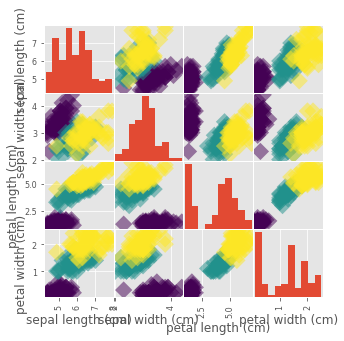

In [16]:
pd.scatter_matrix(df, c = y, figsize=[5,5], s=150, marker='D');

In [ ]:
### TIMING ###                                                                ### COOL ###

print("Fitting...")
s = time.time()
model.fit(X_train, y_train)
print("Fitting completed in: ", time.time() - s)

<a name="Split"></a>
<h3> SPLITTING DATA

In [ ]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.5, random_state=7)

#Transform X_train and X_test in DataFrame
df_Serie = pd.DataFrame(Serie)                # Transforma Serie em Pandas DataFrame
np_Array = Serie.values.reshape(-1, 1)        # Transforma Serie em numpy.ndarray

X_train = y_train.values.reshape(-1,1)
X_test  = y_test.values.reshape(-1,1)

In [ ]:
# Splitting Multilabel data 
from data.multilabel import multilabel_sample_dataframe, multilabel_train_test_split

X_train, X_test, y_train, y_test = multilabel_train_test_split(X, y, 0.2, min_count=3, seed=42)

<a name="Prep"></a>
<h2>PREPROCESSING DATA</h2>

In [ ]:
### Dealing with CATEGIRICAL FEATURE
scikit-learn: OneHotEncoder()
pandas: get_dummies(df, drop_first=True)     # drop one column

In [ ]:
### Handling MISSING data
df.ColA.replace('?', np.nan, inplace=True)
df[df == '?'] = np.nan                       # Convert '?' to NaN

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)     # strategy =  'most_frequent', 
imp.fit(X)
X = imp.transform(X)

In [ ]:
### SCALING
T = preprocessing.MinMaxScaler().fit_transform(df)
T = preprocessing.StandardScaler().fit_transform(df)      # Transforms each feature to have mean 0 and variance 1
T = preprocessing.MinMaxScaler().fit_transform(df)
T = preprocessing.MaxAbsScaler().fit_transform(df)
T = preprocessing.Normalizer().fit_transform(df)

<b>Interaction Feature</b><br>
 Interaction terms are a statistical tool that lets your model express what happens if two features appear together in the same row.

In [ ]:
### POLYNOMIAL FEATURES
""" Due to computational concerns, CountVectorizer return a sparse matrix
    PolynomianFeatures does not support sparse matrices   """

from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2,                  # interaction in 2 columns
                                 interaction_only=True,     # Not interact over the same column
                                 include_bias=False)
interaction.fit_transform(X_train)

In [ ]:
### SPARSE INTERACTIONS
""" SparseInteractions does the same thing as PolynomialFeatures, but it uses sparse matrices to do so. 
    https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py   """

from itertools import combinations
import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

SparseInteractions(degree=2).fit_transform(x).toarray()

<b>Hashing</b><br>
Hashing is a way of increasing memory efficiency, taking a input (token) and output a hash value.<br>
Hash function limits possible outputs, fixing array size

In [ ]:
### Use instead of CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hash_vec = HashingVectorizer(norm=True, non_negative=True, token_pattern=TOKENS_ALPHANUMERIC, ngram_range(1, 2))


<b>LABEL ENCODER</b>

In [ ]:
""" LabelEncoder - Converts a categorical column of strings into integers """
from sklearn.preprocessing import LabelEncoder

df.LotFrontage = df.LotFrontage.fillna(0)                    # Fill missing values with 0
categorical_mask = (df.dtypes == object)                     # Create a boolean mask for categorical columns
categorical_columns = df.columns[categorical_mask].tolist()  # Get list of categorical column names
print(df[categorical_columns].head())                        # Print the head of the categorical columns

le = LabelEncoder()                                          # Create LabelEncoder object
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x)) # Apply LabelEncoder

print(df[categorical_columns].head())                        # Print the head of the LabelEncoded categorical columns


<b>ONE-HOT ENCODER</b>

In [ ]:
""" OneHotEncoder - Takes the column on integers and encodes them as dummy variables """
from sklearn.preprocessing import OneHotEncoder

categorical_mask = (df.dtypes == object)
categorical_columns = df.columns[categorical_mask].tolist()

ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)   # Create OneHotEncoder
df_encoded = ohe.fit_transform(df)                                         # output is no longer a dataframe

print(df_encoded[:5, :])                                                   # Print first 5 rows of the resulting dataset

print(df.shape)                                                            # Print the shape of the original DataFrame
print(df_encoded.shape)                                                    # Print the shape of the transformed array


<b>DICTVECTORIZER</b>

In [ ]:
""" DictVectorizer - Converts lists of feature mappings into vectors """
from sklearn.feature_extraction import DictVectorizer

df_dict = df.to_dict('records')               # Convert df into a dictionary

dv = DictVectorizer(sparse=False)             # Create the DictVectorizer object
df_encoded = dv.fit_transform(df_dict)        # Apply dv on df

print(df_encoded[:5,:])                       # Print the resulting first five rows
print(dv.vocabulary_)                         # Print the vocabulary (maps the names of the features to their indices)


<a name="DimRed"></a>
<h2>DIMENSION REDUCTION</h2><p>
Remove less-informative 'noise' features, which cause problems for prediction tasks (Regression, Classification)<br>
Represents same data, using less features<br>
PCA assumes high variance as important, and low variance as noise

In [ ]:
### PCA   - Principal Component Analysis
# "Principal Components" = directions of variance
""" Rotates data sample to be aligned with axes
Shifts data samples so they have mean 0     """

from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='auto', copy=True)      # svd_solver : string {‘auto’, ‘full’, ‘arpack’, ‘randomized’}
pca.fit(data)
T = pca.transform(data)                                      # or pca.fit_transform(data)

mean = pca.mean_                                    # Get the mean of data
first_pc = model.components_[0,:]                   # Get the fisrt principal component, direction in which data varies the most.

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')

##Intrinsic dimension = number of feats needed to approximate the dataset = number of PCA feats with significant variance

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('variance)
plt.ylabel('PCA feature')
plt.show()

In [ ]:
### TruncatedSVD
# TruncatedSVD works as PCA, but accepts csr_matrix as input
# csr_matrix remembers only the non-zero entries (saves space)

from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components = 3)
model.fit(documents)                              # documents in csr_matrix (sparse matrix)
transformed = model.transform(documents)


In [ ]:
### tf-idf word-frequency array
# It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 
csr_mat = tfidf.fit_transform(documents)

print(csr_mat.toarray())

words = tfidf.get_feature_names()
print(words)


In [ ]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import pandas as pd

svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)
pipeline = make_pipeline(svd, kmeans)

pipeline.fit(wiki_articles)
labels = pipeline.predict(wiki_articles)

df = pd.DataFrame({'label': labels, 'article': titles})
print(df.sort_values('label'))


In [ ]:
### NMF - Non-negative matrix factorization
# NMF models are interpretable (unlike PCA).                # All samples features must be non-negative.
# Works with Numpy arrays and with csr_matrix (Sparse)      # Dimension of components = dimension of samples

from sklearn.decomposition import NMF
nmf = NMF(n_components=6)
nmf.fit(samples)
nmf_features = nmf.transform(samples)
nmf_components = nmf.components_

# Sample reconstruction = multiply components by feature values, and add up

''' NMF learns interpretable parts

### For documents
NMF components represent topics
NMF features combine topics into documents

### For imagens
# NMF components are parts of images    '''


In [ ]:
### Building RECOMMENDER SYSTEMS using NMF ###

### Cosine Similarity
# Higher values means more similar
# Maximum value is 1, when angle is 0º

import pandas as pd
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

scaler = MaxAbsScaler()
nmf = NMF(n_components=20)
normalizer = Normalizer()

pipeline = make_pipeline(scaler, nmf, normalizer)

norm_features = pipeline.fit_transform(artists)

df = pd.DataFrame(norm_features, index=artist_names)

artist = df.loc['Bruce Springsteen']    # Select row of 'Bruce Springsteen'

similarities = df.dot(artist)
print(similarities.nlargest())


In [ ]:
### ISOMAP
from sklearn import manifold
iso = manifold.Isomap(n_components = 2, n_neighbors=4)
iso.fit(data)
T = iso.transform(data)    # ou T = iso.fit_transform(data)

<a name="Clust"></a>
<h2>CLUSTERING</h2><p>
In KMeans: feature variance = feature influence (Need to Scaling)<br>
StandardScaler().fit_transform(df) ----> Transforms each feature to have mean 0 and variance 1

In [ ]:
# KMEANS
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

model.fit(samples)
labels = model.predict(new_samples)


In [ ]:
# Plotting
xs = new_samples[:, 0]
ys = new_samples[:, 1]
plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_             # Assign the cluster centers
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='D', s=50)

plt.show()

In [ ]:
### Evaluating a clustering
pd.crosstab(df['labels'], df['species'])  # Are all species correctly labeled?

### Measure how spread the clusters are. (lower is better)
### Distance from each sample from its centroid
print(model.inertia_)      # lower is better

In [ ]:
### How many CLUSTERS to choose? 
""" Choose an "elbow" in the inertia plot  """

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')         # Plot ks vs inertias
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
### Transforming features for better clusterings
# SCALING
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

<b>Visualizing hierarchies</b>

In [ ]:
### Hierarchical Clustering Graph
### the Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(samples, method='complete')                       # defines how the distance between clusters is measured
dendrogram(mergings, label=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()

""" In complete linkage, the distance between clusters is the distance between the furthest points of the clusters.
    In single linkage, the distance between clusters is the distance between the closest points of the clusters.    """

# Height (y-axis) on dendrogram = distance between merging clusters

from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 15, criterion='distance')  # where 15 is the height (distance)

# Return a narray containing the labels within that height

In [ ]:
### t-SNE for 2-dimensional maps
# t-distributed stochastic neighbor embedding

from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)                   # Try range between 50 and 200
transformed = model.fit_transform(samples)        # TSNE only has fit_transform()

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=species, alpha=0.5)
for x, y, name in zip(xs, ys, species_names):
    plt.annotate(name, (x, y), fontsize=5, alpha=0.75)
plt.show()

<a name="Classif"></a>
<h2>CLASSIFICATION</h2>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier">K-Neighbours Classifier API</a>

In [ ]:
### Support Vectors Classifiers (SVC)

from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test_S, y_test)
print ('Score = ' + str(score))

# parameters = {'C':    [1, 10, 100],
#              'gamma': [0.1, 0.01]}

In [ ]:
### KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)  # ACCURACY is used for Classification = num_correct_pred / total_data

### Parameters:
# n_neighbors : int, optional (default = 5)         # Number of neighbors to use by default for kneighbors queries.
# weights     : str or callable, optional (default = ‘uniform’)
# algorithm   : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional

# larger k = smoother decision boundary = less complex model
# smaller k = more complex model = can lead to overfit

In [ ]:
### Logistic Regression ----> used in Classification, not Regression
### If probability 'p' > 0.5 data labeled '1'; if 'p' < 0.5 label = 0

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


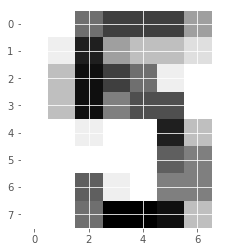

0.983333333333


In [8]:
### CASE STUDY WITH DIGITS IMAGES
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()                            # Load the digits dataset

print(digits.keys())
#print(digits.DESCR)
print(digits.images.shape)
print(digits.data.shape)

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')    # Display digit 1010
plt.show()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

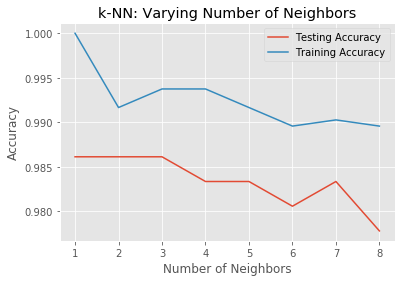

In [9]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):     # Loop over different values of k    
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)    
    train_accuracy[i] = knn.score(X_train, y_train)    
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


<a name="Reg"></a>
<h2>REGRESSION

In [ ]:
# LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation
score = reg.score(X_test, y_test)
print("R^2: {}".format(score))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
sqr_dist = np.sum(reg.predict(X_test) - y_test) ** 2)
print("Sum of Squared Distances: {}".format(sqr_dist))


prediction_space = np.linspace(min(X_train), max(X_train)).reshape(-1,1)     # Create the prediction space
y_pred = reg.predict(X_fertility)                                            # Compute predictions over the prediction space
plt.scatter(X_train, y_train, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)               # Plot regression line
plt.show()


### Methods
# fit(X, y[, sample_weight])                Fit linear model.
# get_params([deep])                        Get parameters for this estimator.
# predict(X)                                Predict using the linear model
# score(X, y[, sample_weight])              Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)                      Set the parameters of this estimator.</pre>

In [20]:
### CASE STUDY
import numpy as np
import pandas as pd

df = pd.read_csv(r'D:\DATA_SCIENCE\BASES\Others\DataCamp\gapminder2008_region.csv')

y = df['life']
X = df['fertility']

print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


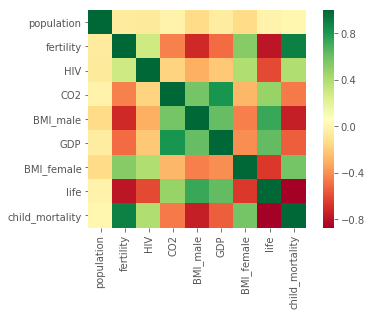

In [24]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

In [ ]:
# RIDGE Regression - Regularization
# Alpha controls model complexity | Alpha = 0; We get back OLS (Can lead to overfitting)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

In [ ]:
# LASSO Regression -- 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

In [ ]:
# Draw coefficients importances
names = df.columns
lasso_coef = lasso.fit(X, y).coef_     #

_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show

In [ ]:
# Regression - ALPHA test and Plot
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)                                 # Setup the array of alphas and lists to store scores
ridge_scores = []
ridge_scores_std = []
folds = 10

ridge = Ridge(normalize=True)                                        # Create a ridge regressor

for alpha in alpha_space:                                            # Compute scores over range of alphas
    
    ridge.alpha = alpha                                              # Specify the alpha value to use       
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=folds)         # Perform 10-fold CV    
    ridge_scores.append(np.mean(ridge_cv_scores))                    # Append the mean of ridge_cv_scores to ridge_scores    
    ridge_scores_std.append(np.std(ridge_cv_scores))                 # Append the std of ridge_cv_scores to ridge_scores_std

display_plot(ridge_scores, ridge_scores_std)                         # Display the plot

<a name="Ensemble"></a>
<h2> ENSEMBLE MODELS

In [ ]:
### RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf_params = {}
rf_params['n_estimators']      = 200
rf_params['oob_score']         = True
rf_params['max_depth']         = 6
rf_params['min_samples_split'] = 70
rf_params['min_samples_leaf']  = 30
rf_model = RandomForestClassifier(**rf_params)

score = model.oob_score_
print("OOB Score: ", round(score*100, 3))

score = model.score(X_test, y_test)
print("Score: ", round(score*100, 3))

In [ ]:
### XGBOOST
### http://xgboost.readthedocs.io/en/latest/python/python_api.html

from xgboost import XGBClassifier                # Não está no scikit-learn
xgb_params = {}
xgb_params['learning_rate']    = 0.02
xgb_params['n_estimators']     = 1000
xgb_params['max_depth']        = 4
xgb_params['subsample']        = 0.9
xgb_params['colsample_bytree'] = 0.9 
XGB_model = XGBClassifier(**rf_params)

<a name="CrossVal"></a>
<h2>Cross-validation</h2>

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(model, X, y, cv=5, scoring='roc_auc')     # scoring: 
# %timeit cross_val_score(model, X, y, cv=5)                            

In [ ]:
# CROSS_VAL with StratKFold
def cross_val_model(X,y, model, n_splits=5):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    X = np.array(X)
    y = np.array(y)

    folds = list(StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42).split(X, y))

    for j, (train_idx, test_idx) in enumerate(folds):
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_holdout = X[test_idx]
        y_holdout = y[test_idx]

        print ("Fit %s fold %d" % (str(model).split('(')[0], j+1))
        model.fit(X_train, y_train)
        cross_score = cross_val_score(model, X_holdout, y_holdout, cv=3, scoring='roc_auc')
        print("    cross_score: %.5f" % cross_score.mean())  

<a name="Tune"></a>
<h2>Hyperparameter tuning

In [ ]:
# Computing best parameters
best_score = []
for C in np.arange(0.05, 2, 0.05):
    for gamma in np.arange(0.001, 0.1, 0.001):
        model_best = SVC(C=C, gamma=gamma)
        model_best.fit(X_train_S, y_train)
        score_best = model_best.score(X_test_S, y_test)
        best_score.append([C,gamma, score_best])
df = pd.DataFrame(best_score, columns=['C', 'gamma', 'score'])
df[df.score == max(df.score)]

In [ ]:
#### GRID SEARCH   - EXAMPLE : XGBoost Parameters tunning
from sklearn.model_selection import GridSearchCV
# Variáveis
scoring     = "accuracy"
n_jobs      = 4
verbose     = 1
model       = ''
model_name  = str(model).split('(')[0]

model = XGBClassifier()
s     = time.time()

## Search grid for optimal parameters                    # 'n_estimators'    : np.arange(250, 750)
xgb_param_grid = {'n_estimators'    : [250, 500, 750],
                  'learning_rate'   : [0.1, 0.05, 0.01],
                  'max_depth'       : [4, 6, 8],
                  'colsample_bytree': [0.8, 0.9, 1.0],
                  'subsample'       : [0.5, 0.75, 1.0],
                  'seed'            : [42]}

gsXGB = GridSearchCV(model, param_grid = xgb_param_grid, cv=5, scoring=scoring, n_jobs=n_jobs , verbose=verbose)
gsXGB.fit(X_train, y_train)

print("Tunning "+ str(model_name) +" completed in: "+ str(time.time()-s) +" s")   # Model Name and timing
print('Best estimator: ',  gsXGB.best_estimator_)                                 # Best estimator
print('Best score: ',      gsXGB.best_score_)                                     # Best score
print('Best parameters: ', gsXGB.best_params_)                                    # Best parameters

In [ ]:
#### RANDOMINED SEARCH
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],               # Setup the parameters and distributions to sample from
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

<a name="Holdout"></a>
<h2>Hold-out set for final evaluation</h2>

In [ ]:
# Split data into training and hold-out set at the beginning
# Perform grid search cross-validation on training set
# Choose best hyperparameters and evaluate on hold-out set

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}             # Create the hyperparameter grid

# In practice, the test set here will function as the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

In [ ]:
### Hold-out set in practice II: Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

<a name="Pipeline"></a>
<h2>PIPELINE

<b>Additional Components Introduced For Pipelines</b><p>
<b>sklearn_pandas:</b><br>
<b>DataFrameMapper</b> - Interoperability between pandas and scikit-learn<br>
<b>CategoricalImputer</b> - Allow for imputation of categorical variables before conversion to integers<p>

<b>sklearn.preprocessing:</b><br>
<b>Imputer</b> - Native imputation of numerical columns in scikit-learn<p>

<b>sklearn.pipeline:</b><br>
<b>FeatureUnion</b> - combine multiple pipelines of features into a single pipeline of features<br>

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LogisticRegression

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()

steps = [('imputation', imp),
         ('logistic_regression', logreg)]
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
pipeline.score(X_test, y_test)

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, MaxAbsScaler
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'                       # Create the token pattern

# create the pipeline object
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 2)))
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [ ]:
# pipeline = make_pipeline(normalizer, kmeans)

<a name="Feat"></a>
<h3>FunctionTransformer & FeatureUnion</h3>
Turns a Python function into an object that a scikit-learn pipeline can understand<br>
Need to write two function for pipeline preprocessing:<br>
- Take entire DataFrame, return numeric columns<br>
- Take entire DataFrame, return text columns<br>
Can then preprocess numeric and text data in separate pipelines<br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sample_df[['numeric', 'with_missing', 'text']],
                                                    pd.get_dummies(sample_df['label']),
                                                    random_state=42)

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)    # validate=False, don't check for NaNs
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)
  
numeric_pipeline = Pipeline([
    ('selector', get_numeric_data),
    ('imputer', Imputer())])

text_pipeline = Pipeline([
    ('selector', get_text_data),
    ('vectorizer', CountVectorizer())])

pl = Pipeline([
    ('union', FeatureUnion([
        ('numeric', numeric_pipeline),
        ('text', text_pipeline)])),
    ('clf', OneVsRestClassifier(LogisticRegression()))])

pl.fit(X_train, y_train)

# Scoring
accuracy = pl.score(X_test, y_test)
print('accuracy on numeric data: ', accuracy)

<a name="Eval"></a>
<h2> EVALUATION

<b>Metrics:</b><br>
<b>Accuracy</b> = (TP + TN) / (TP + FP + TN + FN)<br>
<b>Precision</b> = TP / (TP + FP)<br>
<b>Recall</b>    = TP / (TP + FN)<br>
<b>F1 Score</b> = 2 * (Precision * Recall) / (Precision + Recall)<br>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)
classification_report(y_test, y_pred)

In [ ]:
### ROC CURVE

from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]                     # logreg is LogistcRegression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

### Plot ROC Curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [ ]:
### Area under the ROC curve (AUC)

from sklearn.metrics import roc_auc_score

y_pred_prob = logreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob)


### OR
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

<a name="DiveDeeper"></a>
<h2>Dive Deeper


<b>K-Means</b><br>
<a href="http://link.springer.com/article/10.1007%2FBF02294245">+30 Methods: On Determining the Number of Clusters</a><br>
<a href="https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means">Why K-Means Isn't Great For Sparse Datasets</a><br>
<a href="https://stackoverflow.com/questions/5529625/is-it-possible-to-specify-your-own-distance-function-using-scikit-learn-k-means">K-Means In Sparse High-D Datasets</a><br>
<a href="https://en.wikipedia.org/wiki/K-medoids">K-Medoids</a><br>
<a href="http://www.mecs-press.org/ijisa/ijisa-v4-n1/IJISA-V4-N1-3.pdf">Initial Centroid Positioning</a><p>

<b>K-Neighbors</b><br>
<a href="http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/">Implementing K-Neighbors From Scratch</a><p>

<b>CDR</b><br>
<a href="http://www.gedis-studio.com/online-call-detail-records-cdr-generator.html">Call Detail Records Generator</a><br>
<a href="https://github.com/mayconbordin/cdr-gen">Another Call Detail Records Generator</a><br>
<a href="http://nodobo.com/release.html">Sample (Real) CDR Dataset</a><br>
<a href="http://www.worldpop.org.uk/ebola/">CDR Data Applied in the Wild</a><br>
<a href="http://www.stat.columbia.edu/~meng/Papers/purba.2011.pdf">KMeans + CDR</a><p>

<b>Oddities</b><br>
<a href="https://stackoverflow.com/questions/30918781/right-function-for-normalizing-input-of-sklearn-svm">When to Use Feature Scaling</a><br>
<a href="http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing">SciKit-Learn Preprocessing</a><br>
<a href="https://github.com/tmadl/highdimensional-decision-boundary-plot">Higher Dimensionality Boundaries</a><p>

<b>Linear Regression</b><br>
<a href="http://www.mathsisfun.com/data/standard-deviation.html">Why Squared Differences? | Footnote Section</a><br>
<a href="http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf">An Introduction to Statistical Learning  | Linear Regression in Ch. 3</a><br>
<a href="https://shankarmsy.github.io/posts/pca-vs-lr.html">Linear Regression vs PCA</a><p>

<b>Resource for Audio Machine Learning</b><br>
<a href="https://github.com/netankit/AudioMLProject1">Voice Activity Detection in Python | MFCC Feature Extraction</a><br>
<a href="https://archive.org/details/freefield1010">Freefield1010 Standardized Audio Data Set | Accompanying Research Paper</a><br>
<a href="https://github.com/danstowell/smacpy/blob/master/smacpy.py">Simple Minded Audio Classifier for Python</a><p>

<b>Support Vector Machines</b><br>
<a href="http://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use">Practical Tips for SVC Usage</a><br>
<a href="https://www.youtube.com/watch?v=_PwhiWxHK8o">SVM A-Z in 45 Minutes</a> | MIT Open Courseware with Patrick Winston<br>
<a href="https://www.quora.com/How-does-one-decide-on-which-kernel-to-choose-for-an-SVM-RBF-vs-linear-vs-poly-kernel">How to Choose a Kernel</a><br>
<a href="https://charlesmartin14.wordpress.com/2012/02/06/kernels_part_1/">How Not to Choose a Kernel</a><br>
<a href="http://scikit-learn.org/stable/modules/outlier_detection.html">Outlier Detection Example</a><br>
<a href="https://cs.stanford.edu/people/karpathy/svmjs/demo/">Interactive SVM-JS</a><p>

<b>Decision Trees</b><br>
<a href="http://planspace.org/20151129-see_sklearn_trees_with_d3/">SKLearn and D3</a><br>
<a href="https://en.wikipedia.org/wiki/Decision_tree_learning#Metrics">Information Gain and Metrics</a><br>
<a href="http://pages.cs.wisc.edu/~jerryzhu/cs540/handouts/dt.pdf">Machine Learning with DTrees</a> | CS540<br>
<a href="https://www.ics.uci.edu/~welling/teaching/273ASpring10/recitation4_decision_tree.pdf">Entropy</a><p>

<b>Ensemble Methods</b><br>
<a href="http://scikit-learn.org/stable/modules/ensemble.html">SKLearn Ensemble Methods</a><p>

<b>Machine Learning Cheat-Sheets</b><br>
<a href="https://azure.microsoft.com/en-us/documentation/articles/machine-learning-algorithm-choice/">Microsoft Azure</a><br>
<a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">SciKit-Learn</a><br>
<a href="http://eferm.com/machine-learning-cheat-sheet/">Emanuel Ferm</a><p>

<b>Evaluation Metrics</b><br>
<a href="https://en.wikipedia.org/wiki/False_positives_and_false_negatives">False Positives and False Negatives and their Consequences</a><br>
<a href="http://scikit-learn.org/stable/modules/cross_validation.html">Cross Validation Performance Evaluation</a><br>
<a href="http://scikit-learn.org/stable/modules/grid_search.html#grid-search">Estimator Parameter Search-Space</a><br>
<a href="http://zacstewart.com/2014/08/05/pipelines-of-featureunions-of-pipelines.html">Getting Crazy With Pipelining</a><br>
<a href="https://docs.scipy.org/doc/scipy/reference/stats.html">SciPy Statistics Module</a><br>
<a href="https://en.wikipedia.org/wiki/Overfitting">Overfitting</a><p>

In [ ]:
### Função para Feature Importance
def get_feature_importance_df(feature_importances, column_names, top_n=25):
    """Get feature importance data frame.
 
    Parameters
    ----------
    feature_importances (numpy ndarray) : Feature importances computed by an ensemble model like random forest or boosting
    column_names        (array-like)    : Names of the columns in the same order as feature importances
    top_n               (integer)       : Number of top features
 
    Returns
    -------
    df : a Pandas data frame """
     
    imp_dict = dict(zip(column_names, feature_importances))
    top_features = sorted(imp_dict, key=imp_dict.get, reverse=True)[0:top_n]
    top_importances = [imp_dict[feature] for feature in top_features]
    df = pd.DataFrame(data={'feature': top_features, 'importance': top_importances})
    return df

# Chama a função get_feature_importance_df
features = train.drop(['target'], axis=1).columns.values
feature_importance = get_feature_importance_df(model.feature_importances_, features)

# Plota o resultado
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(data=feature_importance[:10],x="feature",y="importance",ax=ax,color=default_color,)
ax.set(xlabel='Variable name', ylabel='Importance',title="Variable importances")

In [ ]:
### PREPROCESSING
def Do_Scale(train, test, scale):       #Normalizer(), MaxAbsScaler(), MinMaxScaler(), KernelCenterer(), and StandardScaler()
    if scale == 'Normalizer':
        from sklearn.preprocessing import Normalizer
        scaler = Normalizer()
        d1 = scaler.fit_transform(train)
        d2 = scaler.fit_transform(test)
        return d1, d2
    elif scale == 'StandardScaler':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        d1 = scaler.fit_transform(train)
        d2 = scaler.fit_transform(test)
        return d1, d2
    elif scale == 'MaxAbsScaler':
        from sklearn.preprocessing import MaxAbsScaler
        scaler = MaxAbsScaler()
        d1 = scaler.fit_transform(train)
        d2 = scaler.fit_transform(test)
        return d1, d2
    elif scale == 'MinMaxScaler':
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        d1 = scaler.fit_transform(train) 
        d2 = scaler.fit_transform(test)
        return d1, d2
    elif scale == 'KernelCenterer':
        from sklearn.preprocessing import KernelCenterer
        scaler = KernelCenterer()
        d1 = scaler.fit_transform(train)
        d2 = scaler.fit_transform(test)
        return d1, d2
    else:
        return train, test

#Normalizer, StandardScaler, MaxAbsScaler, MinMaxScaler or KernelCenterer
scaler = 'KernelCenterer'
X_train_S, X_test_S = Do_Scale(X_train, X_test, scaler)

In [4]:
import sys
print(sys.path)

['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Babel-2.5.0-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\xgboost-0.6-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martinez\\.ipython', 'D:\\GitHub\\py.modules']


In [3]:
sys.path.append('D:\GitHub\py.modules')

In [6]:
from SparseInteractions import SparseInteractions